# Model 2: Logistic Regression Classification
## Predicting Order Completion Status

### Objective:
Build a **Logistic Regression Classifier** to predict whether an order will be completed successfully or not.

### Why Logistic Regression?
- Simple and interpretable (great for beginners!)
- Fast training and prediction
- Provides probability estimates
- Works well for binary classification
- Industry standard baseline model
- Easy to understand coefficients and their impact

## Step 1: Import Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

# Settings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## Step 2: Load the Cleaned Data

**Note:** Make sure your cleaned data file named `cleaned_final_data.csv`

In [2]:
# Load the dataset
df = pd.read_csv('cleaned_final_data.csv')

print("="*60)
print("DATA LOADED SUCCESSFULLY")
print("="*60)
print(f"Dataset Shape: {df.shape}")
print(f"Total Rows: {len(df):,}")
print(f"Total Columns: {len(df.columns)}")
print("="*60)

# Check the distribution of order status
print("\nOrder Status Distribution:")
print(df['status'].value_counts())
print("\nPercentage:")
print(df['status'].value_counts(normalize=True) * 100)

DATA LOADED SUCCESSFULLY
Dataset Shape: (570901, 21)
Total Rows: 570,901
Total Columns: 21

Order Status Distribution:
status
complete          236252
canceled          193919
received           75779
order_refunded     64763
pending              108
payment_review        57
unknown               16
fraud                  7
Name: count, dtype: int64

Percentage:
status
complete          41.382306
canceled          33.967185
received          13.273580
order_refunded    11.343998
pending            0.018917
payment_review     0.009984
unknown            0.002803
fraud              0.001226
Name: proportion, dtype: float64


## Step 3: Data Preprocessing for Classification

### Create Binary Target Variable
We'll convert the multi-class status into binary: **Complete** (1) vs **Not Complete** (0)

Binary Target Created:
is_complete
0    334649
1    236252
Name: count, dtype: int64

Percentage:
is_complete
0    58.617694
1    41.382306
Name: proportion, dtype: float64


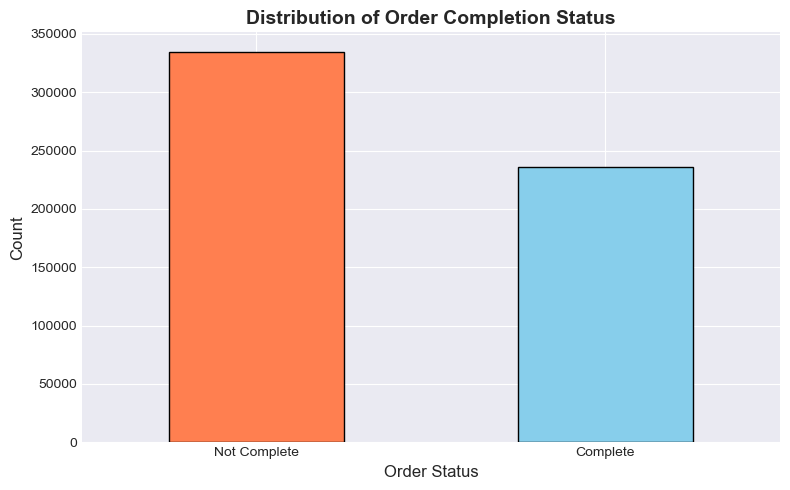

In [3]:
# Create binary target: 1 if complete, 0 otherwise
df['is_complete'] = (df['status'] == 'complete').astype(int)

print("Binary Target Created:")
print(df['is_complete'].value_counts())
print("\nPercentage:")
print(df['is_complete'].value_counts(normalize=True) * 100)

# Visualize class distribution
plt.figure(figsize=(8, 5))
df['is_complete'].value_counts().plot(kind='bar', color=['coral', 'skyblue'], edgecolor='black')
plt.xlabel('Order Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Order Completion Status', fontsize=14, fontweight='bold')
plt.xticks([0, 1], ['Not Complete', 'Complete'], rotation=0)
plt.tight_layout()
plt.show()

### Select Features for Classification

In [4]:
# Select relevant features
feature_columns = [
    'price',
    'qty_ordered',
    'discount_amount',
    'month',
    'category_name_1',
    'payment_method'
]

target_column = 'is_complete'

# Create a copy with only needed columns
df_model = df[feature_columns + [target_column]].copy()

# Remove any rows with missing values
df_model = df_model.dropna()

print(f"✓ Model dataset shape: {df_model.shape}")
print(f"✓ Features: {len(feature_columns)}")
print(f"✓ Target: {target_column}")

# Check for missing values
print("\nMissing values:")
print(df_model.isnull().sum())

✓ Model dataset shape: (570901, 7)
✓ Features: 6
✓ Target: is_complete

Missing values:
price              0
qty_ordered        0
discount_amount    0
month              0
category_name_1    0
payment_method     0
is_complete        0
dtype: int64


### Encode Categorical Variables

In [5]:
# Initialize label encoders
label_encoders = {}

# Encode categorical columns
categorical_columns = ['category_name_1', 'payment_method']

for col in categorical_columns:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le
    
print("✓ Categorical variables encoded successfully!")
print("\nEncoded Dataset:")
df_model.head()

✓ Categorical variables encoded successfully!

Encoded Dataset:


,price,qty_ordered,discount_amount,month,category_name_1,payment_method,is_complete
0,1950.0,1.0,0.0,7.0,14,2,1
1,240.0,1.0,0.0,7.0,1,2,0
2,2450.0,1.0,0.0,7.0,14,2,0
3,360.0,1.0,300.0,7.0,1,2,1
4,555.0,2.0,0.0,7.0,11,2,0


## Step 4: Split Data and Scale Features

Logistic Regression performs better with scaled features!

In [6]:
# Separate features (X) and target (y)
X = df_model[feature_columns]
y = df_model[target_column]

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Maintain class distribution in train/test
)

# Scale the features (important for Logistic Regression!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("="*60)
print("DATA SPLIT & SCALING COMPLETE")
print("="*60)
print(f"Training set size: {X_train.shape[0]:,} samples ({(X_train.shape[0]/len(X))*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]:,} samples ({(X_test.shape[0]/len(X))*100:.1f}%)")
print(f"Number of features: {X_train.shape[1]}")
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True) * 100)
print("="*60)

DATA SPLIT & SCALING COMPLETE
Training set size: 456,720 samples (80.0%)
Testing set size: 114,181 samples (20.0%)
Number of features: 6

Class distribution in training set:
is_complete
0    58.617753
1    41.382247
Name: proportion, dtype: float64


## Step 5: Train the Logistic Regression Model

In [7]:
# Initialize Logistic Regression
log_model = LogisticRegression(
    random_state=42,
    max_iter=1000,      # Maximum iterations for convergence
    solver='lbfgs',     # Optimization algorithm
    n_jobs=-1           # Use all CPU cores
)

print("Training Logistic Regression Model...")

# Train the model
log_model.fit(X_train_scaled, y_train)

print("="*60)
print("✓ MODEL TRAINED SUCCESSFULLY!")
print("="*60)

Training Logistic Regression Model...
✓ MODEL TRAINED SUCCESSFULLY!


## Step 6: Make Predictions

In [8]:
# Make predictions
y_train_pred = log_model.predict(X_train_scaled)
y_test_pred = log_model.predict(X_test_scaled)

# Get prediction probabilities
y_train_proba = log_model.predict_proba(X_train_scaled)[:, 1]
y_test_proba = log_model.predict_proba(X_test_scaled)[:, 1]

print("✓ Predictions completed!")
print(f"\nFirst 10 predictions:")
comparison_df = pd.DataFrame({
    'Actual': y_test[:10].values,
    'Predicted': y_test_pred[:10],
    'Probability': y_test_proba[:10]
})
comparison_df['Actual'] = comparison_df['Actual'].map({0: 'Not Complete', 1: 'Complete'})
comparison_df['Predicted'] = comparison_df['Predicted'].map({0: 'Not Complete', 1: 'Complete'})
print(comparison_df)

✓ Predictions completed!

First 10 predictions:
         Actual     Predicted  Probability
0      Complete  Not Complete     0.367875
1      Complete      Complete     0.553221
2  Not Complete  Not Complete     0.371315
3      Complete  Not Complete     0.458812
4      Complete  Not Complete     0.490708
5  Not Complete      Complete     0.564369
6  Not Complete      Complete     0.516732
7      Complete      Complete     0.519997
8  Not Complete  Not Complete     0.490451
9  Not Complete  Not Complete     0.162074


## Step 7: Evaluate Model Performance

Classification metrics:
- **Accuracy**: Overall correctness
- **Precision**: Of predicted Complete, how many are actually Complete?
- **Recall**: Of actual Complete, how many did we predict?
- **F1-Score**: Harmonic mean of Precision and Recall
- **AUC-ROC**: Area under the ROC curve

In [9]:
# Calculate metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_proba)

# Calculate metrics for testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_proba)

# Display results
print("="*60)
print("MODEL PERFORMANCE METRICS")
print("="*60)
print("\nTRAINING SET:")
print(f"  Accuracy:  {train_accuracy:.4f}")
print(f"  Precision: {train_precision:.4f}")
print(f"  Recall:    {train_recall:.4f}")
print(f"  F1-Score:  {train_f1:.4f}")
print(f"  AUC-ROC:   {train_auc:.4f}")

print("\nTESTING SET:")
print(f"  Accuracy:  {test_accuracy:.4f} ⭐")
print(f"  Precision: {test_precision:.4f}")
print(f"  Recall:    {test_recall:.4f}")
print(f"  F1-Score:  {test_f1:.4f}")
print(f"  AUC-ROC:   {test_auc:.4f}")
print("="*60)

# Detailed classification report
print("\n\nDETAILED CLASSIFICATION REPORT (Test Set):")
print(classification_report(y_test, y_test_pred, target_names=['Not Complete', 'Complete']))

MODEL PERFORMANCE METRICS

TRAINING SET:
  Accuracy:  0.6180
  Precision: 0.5570
  Recall:    0.3754
  F1-Score:  0.4485
  AUC-ROC:   0.6500

TESTING SET:
  Accuracy:  0.6159 ⭐
  Precision: 0.5532
  Recall:    0.3728
  F1-Score:  0.4455
  AUC-ROC:   0.6492


DETAILED CLASSIFICATION REPORT (Test Set):
              precision    recall  f1-score   support

Not Complete       0.64      0.79      0.71     66930
    Complete       0.55      0.37      0.45     47251

    accuracy                           0.62    114181
   macro avg       0.60      0.58      0.58    114181
weighted avg       0.60      0.62      0.60    114181



## Step 8: Confusion Matrix

Shows how many predictions were correct vs incorrect.

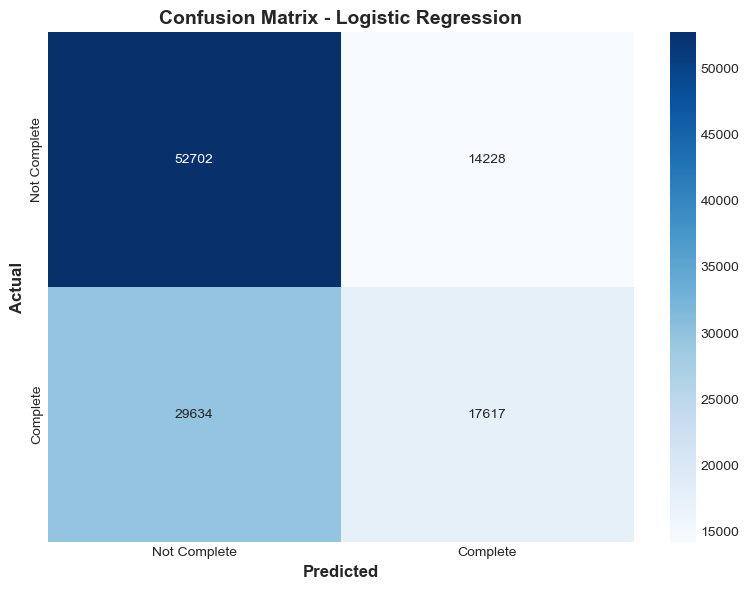

In [15]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Not Complete', 'Complete'],
            yticklabels=['Not Complete', 'Complete'])
plt.xlabel('Predicted', fontsize=12, fontweight='bold')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix - Logistic Regression', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Interpretation
tn, fp, fn, tp = cm.ravel()


## Step 9: ROC Curve

Shows the trade-off between True Positive Rate and False Positive Rate.

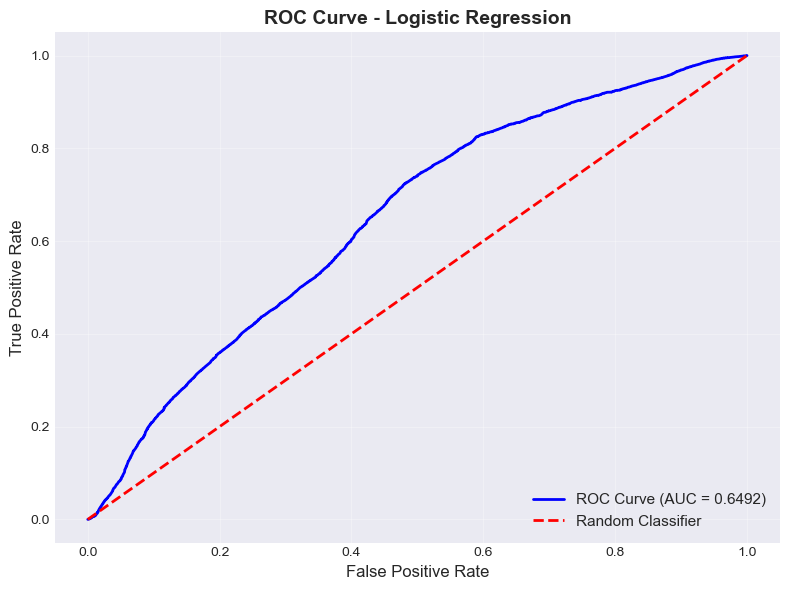

○ Fair performance


In [16]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {test_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Logistic Regression', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


if test_auc > 0.8:
    print("✓ Excellent performance!")
elif test_auc > 0.7:
    print("✓ Good performance")
elif test_auc > 0.6:
    print("○ Fair performance")
else:
    print("○ Poor performance")

## Step 10: Feature Coefficients

Shows how each feature influences the prediction.

Feature Coefficients:
           Feature  Coefficient
2  discount_amount     0.268003
3            month     0.143607
4  category_name_1    -0.072832
0            price    -0.383856
5   payment_method    -0.420393
1      qty_ordered    -0.446497


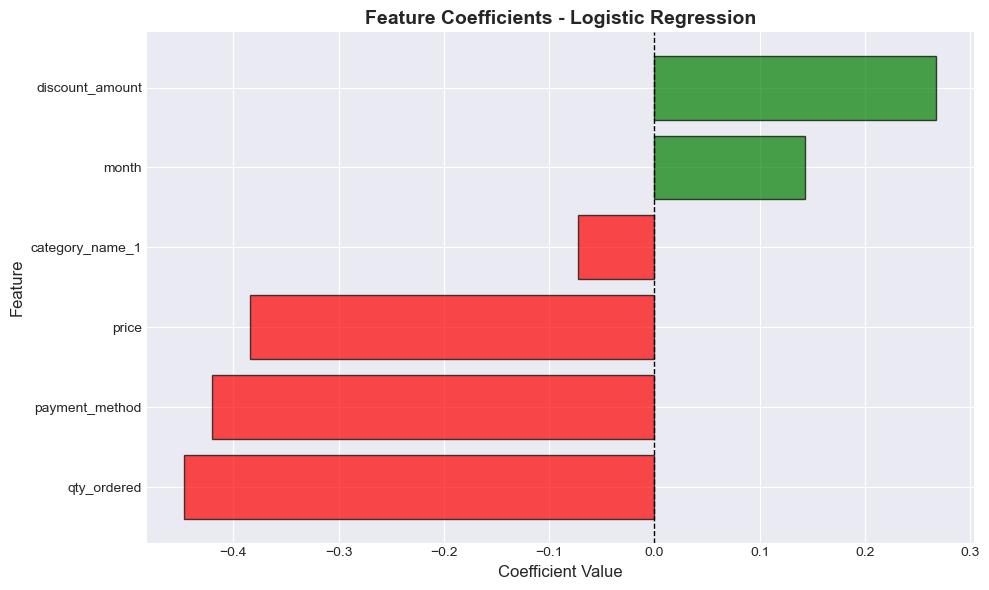


💡 INTERPRETATION:
  • Positive coefficient → increases probability of completion
  • Negative coefficient → decreases probability of completion
  • Larger absolute value → stronger influence


In [12]:
# Get feature coefficients
coefficients = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': log_model.coef_[0]
}).sort_values('Coefficient', ascending=False)

print("Feature Coefficients:")
print(coefficients)

# Visualize coefficients
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in coefficients['Coefficient']]
plt.barh(coefficients['Feature'], coefficients['Coefficient'], color=colors, alpha=0.7, edgecolor='black')
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Coefficients - Logistic Regression', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n💡 INTERPRETATION:")
print("  • Positive coefficient → increases probability of completion")
print("  • Negative coefficient → decreases probability of completion")
print("  • Larger absolute value → stronger influence")

## Step 11: Additional Visualizations

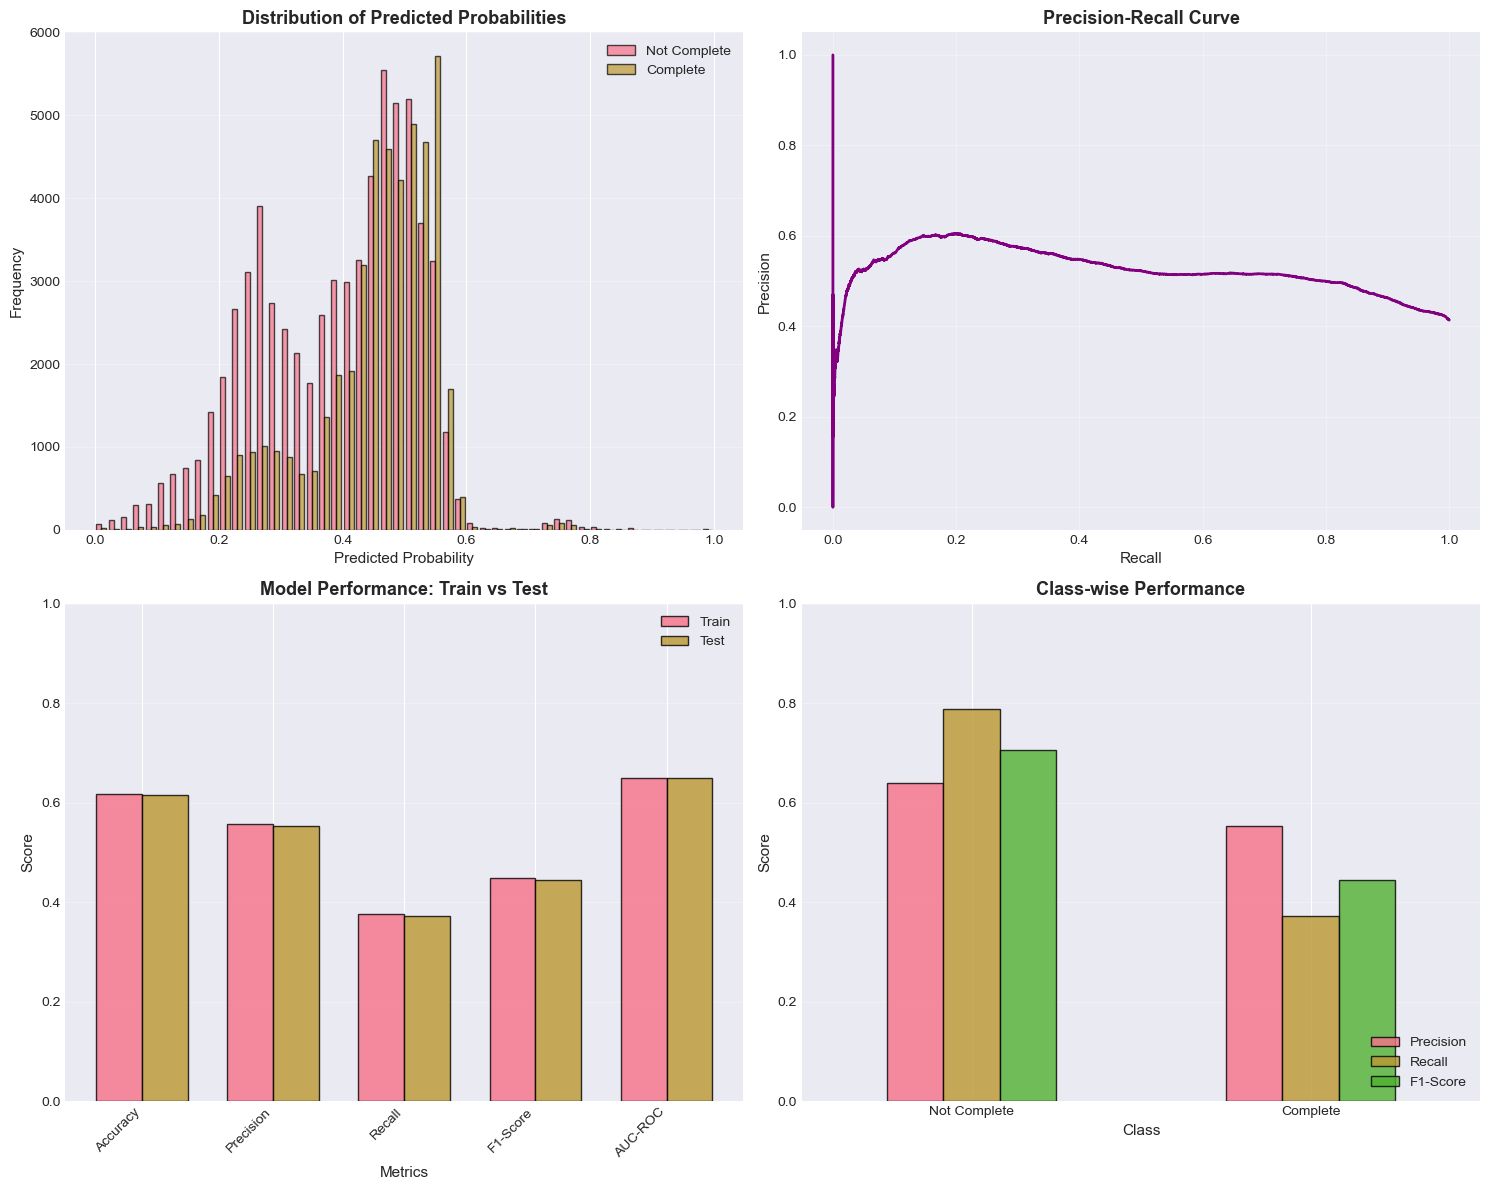

✓ All visualizations generated successfully!


In [13]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Prediction Distribution
axes[0, 0].hist([y_test_proba[y_test == 0], y_test_proba[y_test == 1]], 
                bins=50, label=['Not Complete', 'Complete'], alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Predicted Probability', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Distribution of Predicted Probabilities', fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='y')

# 2. Precision-Recall trade-off
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
axes[0, 1].plot(recall, precision, color='purple', lw=2)
axes[0, 1].set_xlabel('Recall', fontsize=11)
axes[0, 1].set_ylabel('Precision', fontsize=11)
axes[0, 1].set_title('Precision-Recall Curve', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Model Performance Comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
train_scores = [train_accuracy, train_precision, train_recall, train_f1, train_auc]
test_scores = [test_accuracy, test_precision, test_recall, test_f1, test_auc]

x = np.arange(len(metrics))
width = 0.35

axes[1, 0].bar(x - width/2, train_scores, width, label='Train', alpha=0.8, edgecolor='black')
axes[1, 0].bar(x + width/2, test_scores, width, label='Test', alpha=0.8, edgecolor='black')
axes[1, 0].set_xlabel('Metrics', fontsize=11)
axes[1, 0].set_ylabel('Score', fontsize=11)
axes[1, 0].set_title('Model Performance: Train vs Test', fontsize=13, fontweight='bold')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(metrics, rotation=45, ha='right')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')
axes[1, 0].set_ylim([0, 1])

# 4. Class-wise performance
class_performance = pd.DataFrame({
    'Class': ['Not Complete', 'Complete'],
    'Precision': precision_score(y_test, y_test_pred, average=None),
    'Recall': recall_score(y_test, y_test_pred, average=None),
    'F1-Score': f1_score(y_test, y_test_pred, average=None)
})

class_performance.set_index('Class').plot(kind='bar', ax=axes[1, 1], 
                                          alpha=0.8, edgecolor='black', rot=0)
axes[1, 1].set_xlabel('Class', fontsize=11)
axes[1, 1].set_ylabel('Score', fontsize=11)
axes[1, 1].set_title('Class-wise Performance', fontsize=13, fontweight='bold')
axes[1, 1].legend(loc='lower right')
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

print("✓ All visualizations generated successfully!")

## Step 12: Save the Model (Optional)

In [14]:
import pickle

# Save the model
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(log_model, file)

# Save the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Save the label encoders
with open('label_encoders_classification.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)

print("✓ Model saved successfully!")
print("  - logistic_regression_model.pkl")
print("  - scaler.pkl")
print("  - label_encoders_classification.pkl")
print("\n💡 You can load this model later without retraining!")

✓ Model saved successfully!
  - logistic_regression_model.pkl
  - scaler.pkl
  - label_encoders_classification.pkl

💡 You can load this model later without retraining!


## 🎯 Conclusion

### What We Did:
1. ✅ Loaded and preprocessed the e-commerce dataset
2. ✅ Created binary target variable (Complete vs Not Complete)
3. ✅ Encoded categorical variables
4. ✅ Scaled features for optimal performance
5. ✅ Split data maintaining class distribution
6. ✅ Trained a Logistic Regression Classifier
7. ✅ Evaluated model with multiple metrics
8. ✅ Analyzed confusion matrix and ROC curve
9. ✅ Interpreted feature coefficients
10. ✅ Created comprehensive visualizations
11. ✅ Saved the model for future use

### Key Takeaways:
- Logistic Regression is simple, fast, and interpretable
- Feature scaling is important for Logistic Regression
- Coefficients show how features influence predictions
- Multiple metrics provide complete performance picture
- The model can predict order completion likelihood

### Model Comparison (Random Forest vs Logistic Regression):

| Aspect | Random Forest | Logistic Regression |
|--------|--------------|---------------------|
| **Problem Type** | Regression | Classification |
| **Interpretability** | Medium | High |
| **Training Speed** | Slower | Faster |
| **Feature Scaling** | Not needed | Required |
| **Overfitting Risk** | Medium | Low |
| **Best For** | Complex non-linear relationships | Binary decisions, probability estimates |

### Next Steps:
- Try different classification algorithms (Decision Tree, SVM)
- Tune hyperparameters for better performance
- Handle class imbalance if present
- Feature engineering for improved predictions
- Deploy model for real-time predictions

---
**Excellent work! 🎉**